<a href="https://colab.research.google.com/github/callysthenes/reinforcement_learning/blob/main/RL_Q_Learning_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q* Learning with FrozenLake 4x4

In this Notebook, we'll implement an agent <b>that plays FrozenLake.</b>

![alt text](http://simoninithomas.com/drlc/Qlearning/frozenlake4x4.png)

The goal of this game is <b>to go from the starting state (S) to the goal state (G)</b> by walking only on frozen tiles (F) and avoid holes (H). However, the ice is slippery, **so you won't always move in the direction you intend (stochastic environment)**

This excercise is an adapted version of this [notebook](https://colab.research.google.com/github/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Q_Learning_with_FrozenLakev2.ipynb), from this [Deep Reinforcement Learning Course](https://simoninithomas.github.io/Deep_reinforcement_learning_Course/)

## Step -1: Install the dependencies on Google Colab

In [ ]:
!pip install numpy > /dev/null 2>&1
!pip install gym > /dev/null 2>&1

## Step 0: Import the dependencies 📚
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers

In [ ]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

## Step 1: Create the environment 🎮
- Here we'll create the FrozenLake 8x8 environment.
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>
- In our case we choose to use Frozen Lake.

In [ ]:
env = gym.make("FrozenLake-v1")

## Step 2: Create the Q-table and initialize it 🗄️
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

print(f"Action space is {action_size}; State_space is {state_size}\n")

Action space is 4; State_space is 16



In [ ]:
# Create our Q table with state_size rows and action_size columns (64x4)
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Step 3: Create the hyperparameters ⚙️
- Here, we'll specify the hyperparameters

In [ ]:
total_episodes = 10000       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 5e-3             # Exponential decay rate for exploration prob

## Step 4: The Q learning algorithm 🧠
- Now we implement the Q learning algorithm:
  ![alt text](http://simoninithomas.com/drlc/Qlearning//qtable_algo.png)


Score over time: 0.4688
[[5.94174489e-02 1.72578175e-01 1.28887858e-01 5.90269629e-02]
 [1.77121918e-03 2.45524146e-02 1.37775865e-02 8.64750160e-02]
 [1.19122746e-02 3.38284079e-02 1.66282346e-02 3.44341891e-02]
 [2.48959181e-03 1.47916805e-02 8.77812867e-03 6.74669275e-02]
 [1.77491117e-01 5.90646562e-02 1.59810306e-04 1.22836313e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.23873036e-03 5.78563013e-07 1.67774754e-03 2.72672694e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.32764529e-01 3.27081463e-02 2.85976687e-02 2.80876687e-01]
 [4.41685014e-02 5.24459118e-01 2.57540262e-03 6.41078317e-03]
 [2.08944237e-01 2.54049521e-01 1.66624068e-02 6.39589859e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.85685806e-02 1.91167074e-01 6.43491285e-01 4.66577678e-02]
 [2.97684590e-01 4.70696067e-01 9.94331762e-01 5.53118430e-01]
 [0.00000000e+00 0.00000000e+00

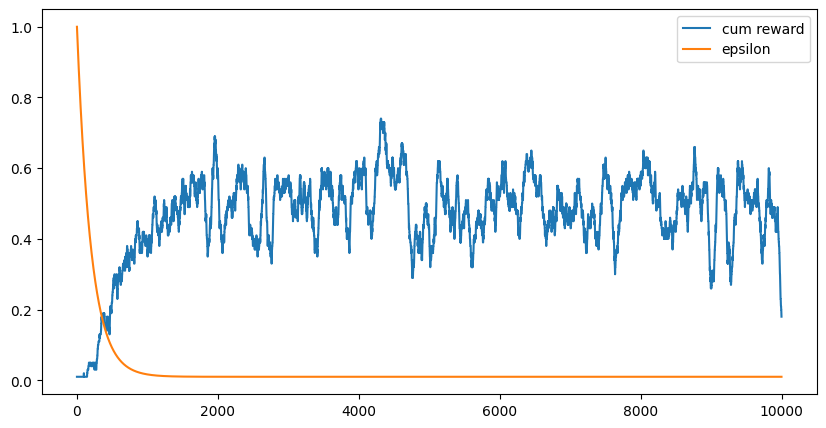

In [ ]:
# List of rewards
rewards = []
epsilons= []

for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        #Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            #print(exp_exp_tradeoff, "action", action)

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()
            #print("action random", action)


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    epsilons.append(epsilon)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)
plt.figure(figsize=(10, 5))
N = 100
plt.plot(range(total_episodes), np.convolve(rewards, np.ones(100)/100, mode='same'), label="cum reward")
plt.plot(range(total_episodes), epsilons, label='epsilon')
plt.legend(loc="upper right")

plt.show()

## Step 5: Use our Q-table to play FrozenLake ! 👾
- After 10 000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake"
- By running this cell you can see our agent playing FrozenLake.

In [ ]:
# install for rendering the game
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools > /dev/null 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

In [ ]:
from gym import logger as gymlogger
from gym.wrappers.monitoring.video_recorder import VideoRecorder
gymlogger.set_level(40) #error only
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
"""

def show_video(name):
  mp4list = glob.glob(f'./{name}.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env, name):
  video = VideoRecorder(env, f'./{name}.mp4')
  return env, video

In [ ]:
video_name="frozen-lake-test2"
_, video = wrap_env(env=env, name=video_name)

In [ ]:
env.reset()

step = 0
done = False

for step in range(max_steps):

    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(qtable[state,:])

    new_state, reward, done, info = env.step(action)
    env.render()
    video.capture_frame()

    if done:
        # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)

        if new_state == 15:
            print("We reached our Goal 🏆")
        else:
            print("We fell into a hole ☠️")

        # We print the number of step it took.
        print("Number of steps", step)

        break
    state = new_state
env.close()
video.close()

We reached our Goal 🏆
Number of steps 21


In [ ]:
show_video(video_name)